In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar datos
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Definir columnas de features y target
predictors = data.keys()
predictors = predictors.drop('output')

print(predictors, len(predictors))

target = 'output'

print(target, len(target))

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object') 13
output 6


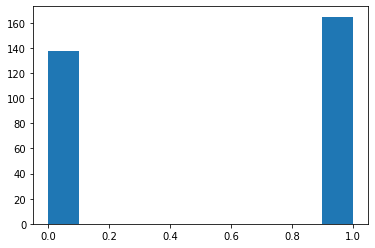

In [4]:
_ = plt.hist(data[target])

In [5]:
# Dafinir X y Y
X = data[predictors]
Y = data[target]

In [6]:
# Cargar Método de Modelo
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [7]:
# partir entre train_test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
print(np.shape(X_train), np.shape(Y_train))

(212, 13) (212,)


In [8]:
AdaB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=10, learning_rate=0.1)
AdaB.fit(X_train, Y_train)
print(f1_score(Y_test, AdaB.predict(X_test)))

0.8545454545454545


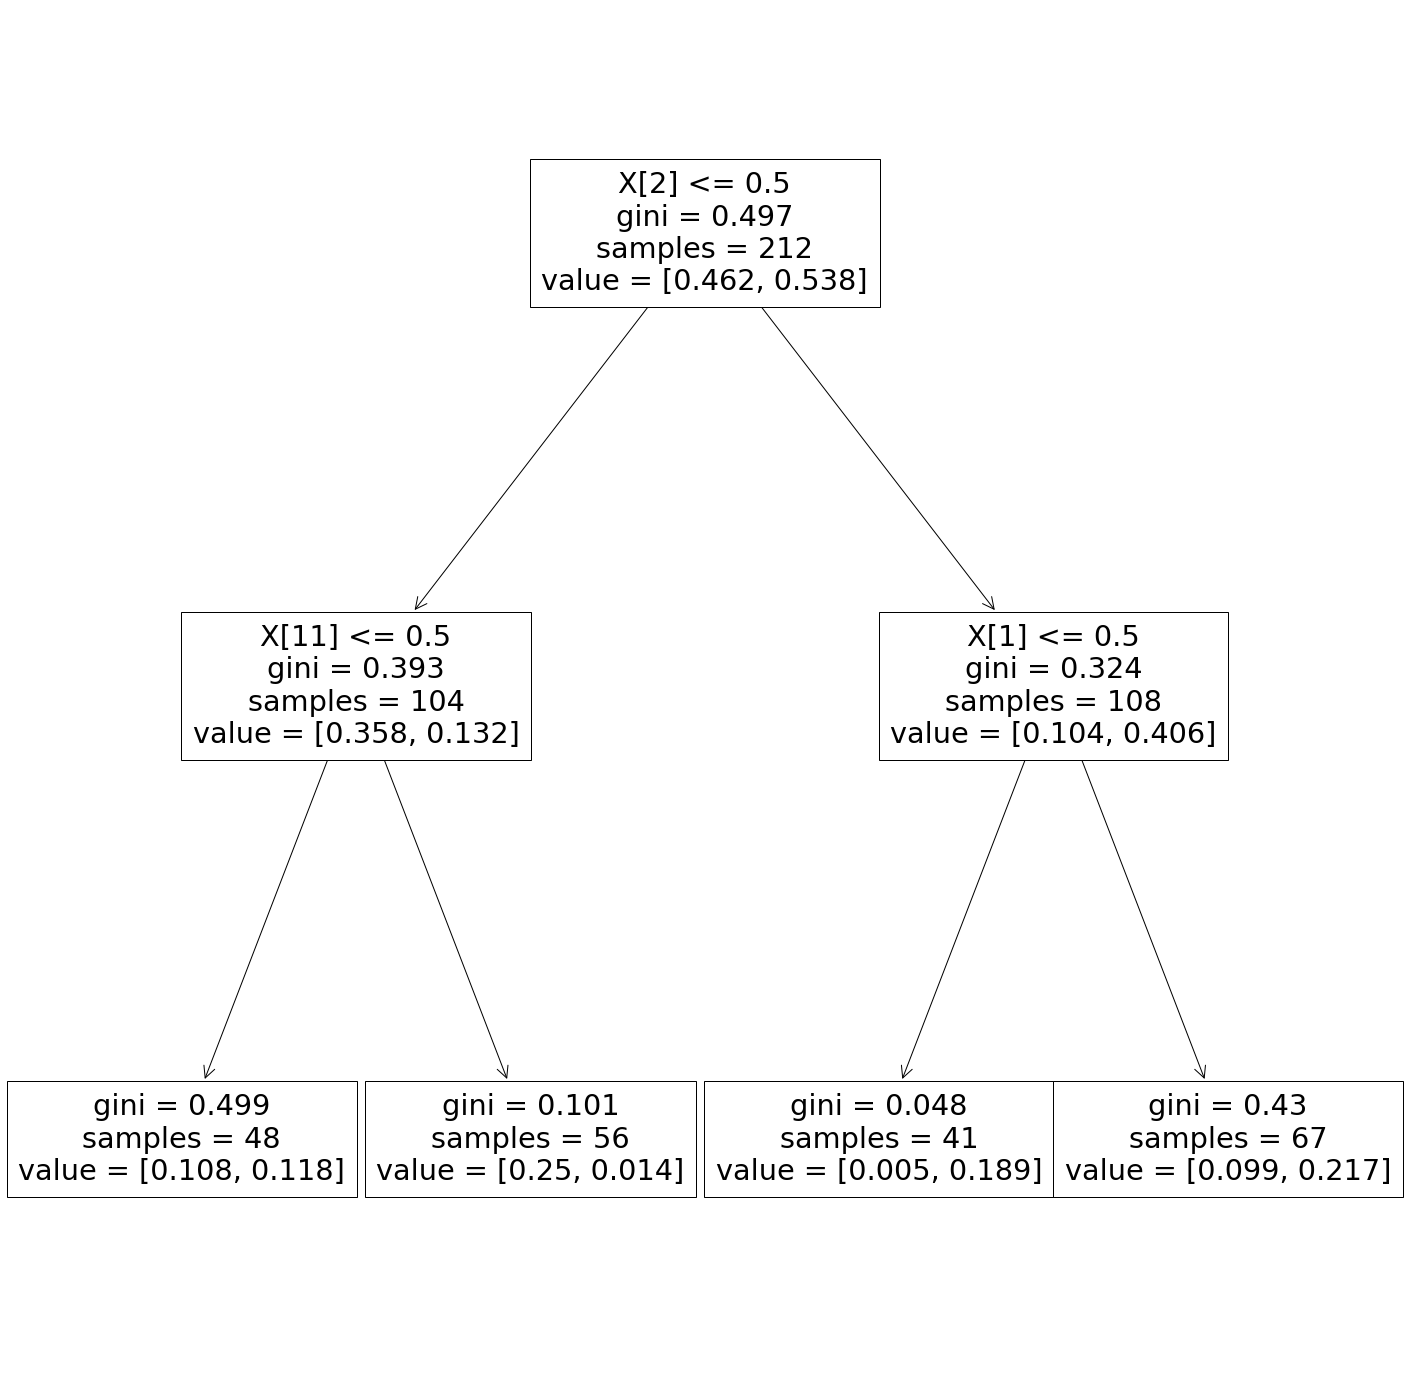

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,25))
_= plot_tree(AdaB.estimators_[0])

/home/toshiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/home/toshiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/toshiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previou

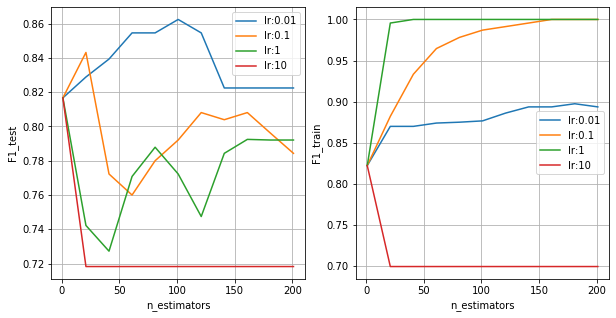

In [10]:
learning_rates = [0.01,0.1,1,10]
n_estimators = np.arange(1,220,20)

fig = plt.figure(figsize=(10,5))

for lr in learning_rates:
    f1_test = []
    f1_train = []

    for ne in n_estimators:
        AdaB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=ne, learning_rate=lr)
        AdaB.fit(X_train, Y_train)
        f1_test.append( f1_score(Y_test, AdaB.predict(X_test)) )
        f1_train.append( f1_score(Y_train, AdaB.predict(X_train)) )
        
    plt.subplot(1,2,1)
    plt.plot(n_estimators,f1_test, label=f'lr:{lr}')
    
    plt.subplot(1,2,2)
    plt.plot(n_estimators,f1_train, label=f'lr:{lr}')

    
plt.subplot(1,2,1)
plt.grid()
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('F1_test')

plt.subplot(1,2,2)
plt.grid()
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('F1_train')

plt.show()

In [11]:
AdaB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=61, learning_rate=0.01)
AdaB.fit(X_train, Y_train)
f1_score(Y_test,AdaB.predict(X_test))

0.8545454545454545

Text(0.5, 0, 'Feature Importances')

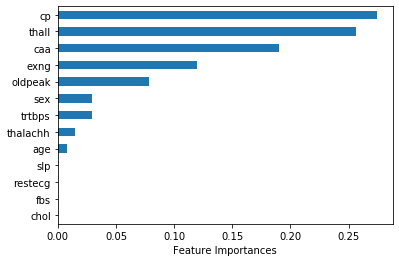

In [12]:
# Grafica las importancias en orden descendente
ii = np.argsort(AdaB.feature_importances_)

importances = AdaB.feature_importances_[ii]
predictors = predictors[ii]

a = pd.Series(importances, index=predictors)
a.plot(kind='barh')
plt.xlabel('Feature Importances')

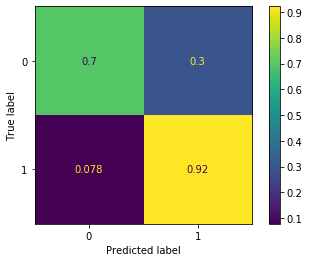

In [13]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(AdaB, X_test, Y_test, normalize='true')